In [3]:
import RSPAnalyzer as rs
import corner
import numpy as np
import pandas as pd


 (1) in order to modify more parameters, you can run the program using its inner functions:

time epocs (DAYS): [21.6 27.6 43.5 75.4]
freq epocs (Ghz): [21.6 27.6 43.5 75.4]
init func: 
27.6 7.389999999999999e-27 7.4
init_guess [15.48921851  0.8         5.         -1.          3.        ]
sol [15.48921851  0.8         5.         -1.          3.        ]
Maximum likelihood estimates:
R0 = 15.489
m = 0.800
RHO0 = 5.000
k = -1.000
gamma = 3.000


/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]
/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]


100%|██████████| 10000/10000 [07:27<00:00, 22.35it/s]


Serial took 447.7 seconds
15.520423940504937 0.8292628539421041 5.251987778806241 -1.9986251913731994 3.2283545010316166


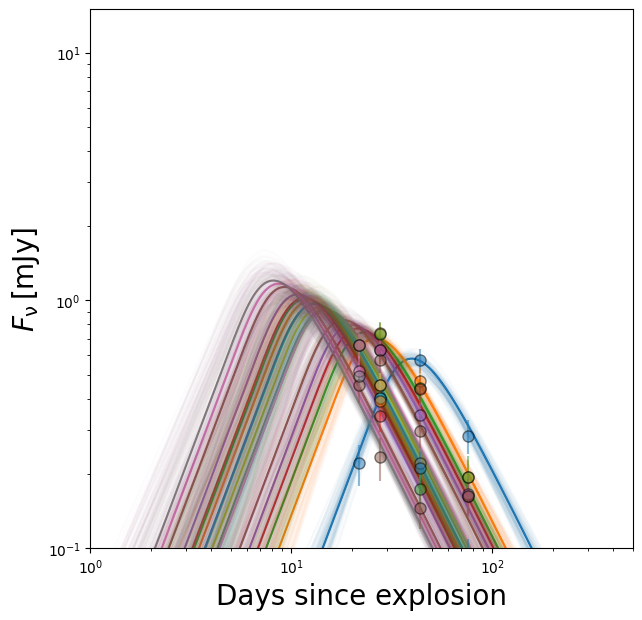

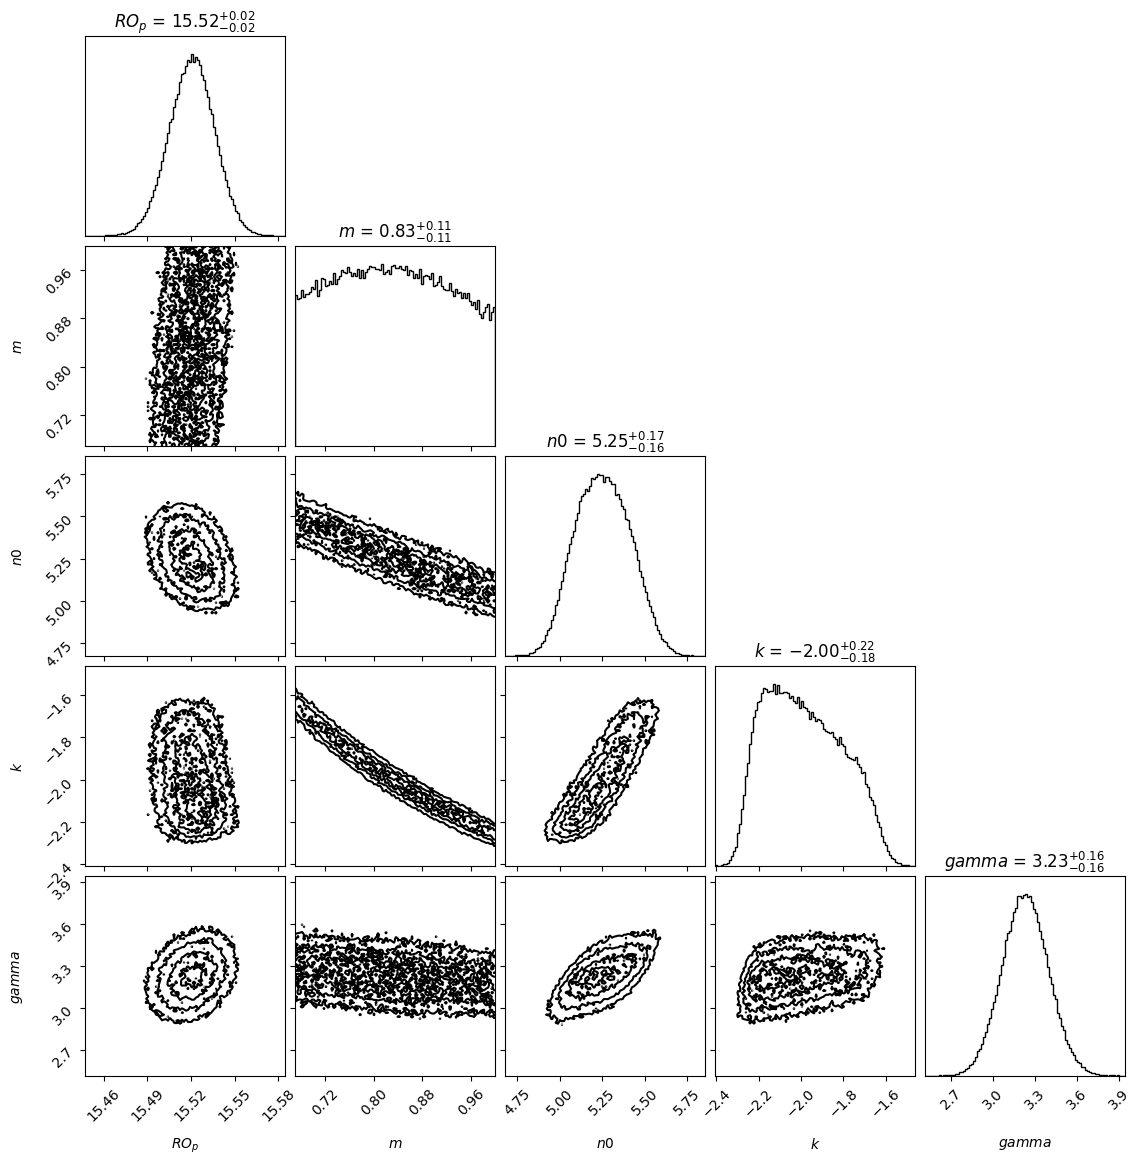

In [7]:
filtered_df2016X= rs.csv_file_to_dfs("sn_2016X_mod.csv")
rs.show_epocs(filtered_df2016X)
new_df0 = rs.single_epoch(filtered_df2016X, 43.5 ,"delta_t")

new_df1 = rs.single_epoch(filtered_df2016X, 75.4 ,"delta_t")
new_df2 = rs.single_epoch(filtered_df2016X, 21.6,"delta_t")
new_df3 = rs.single_epoch(filtered_df2016X, 27.6,"delta_t")

df2016X = pd.concat([new_df0,new_df1,new_df2,new_df3], ignore_index=True)

v_vec2016X = df2016X['freq'].values*rs.Ghz
t_vec2016X =df2016X['delta_t'].values*rs.DAYS
y2016X = df2016X['flux'].values
yerr2016X = df2016X['flux_err'].values

x2016X = (t_vec2016X, v_vec2016X)
d2016X=15.2*rs.MPC
tp2016X,fp2016X,vp2016X = rs.find_flux_time_peak_value(df2016X,'flux')
solnx2016X = rs.calc_likeli_param(x=x2016X,y=y2016X,yerr=yerr2016X,d=d2016X,k=-1,m=0.8,gamma=3)
sampler2016X = rs.run_mcmc_get_sampler(x=x2016X,y=y2016X,yerr=yerr2016X,tp=tp2016X,d=d2016X,nwalkers=200,ndim=5,nsteps=10000,solnx=solnx2016X)
flat_samples2016X = sampler2016X.get_chain(discard=1000, thin=15, flat=True)
mcmc_params2016X = rs.extract_mcmc_params(sampler2016X)
rs.plot_light_curve(x=x2016X,y=y2016X,yerr=yerr2016X,xlim=[1,500],ylim=[1e-1,15],tp=tp2016X,d=d2016X,mcmc_params=mcmc_params2016X,flat_samples=flat_samples2016X,legend=False)
fig2016X = corner.corner(flat_samples2016X[1:],labels=[r'$RO_p$',r'$m$',r'$n0$',r'$k$',r'$gamma$'],bins=100,
                    show_titles=True,plot_density=False,plot_datapoints=False)

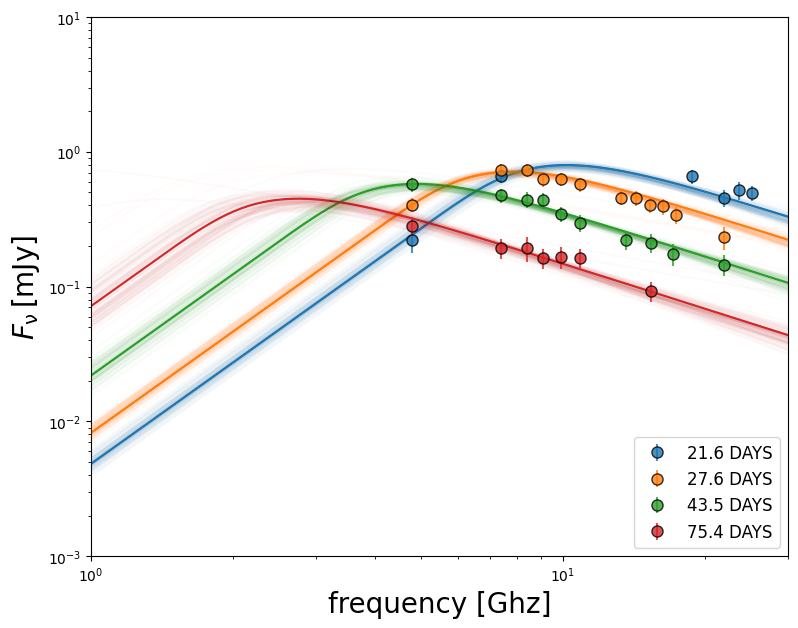

In [23]:

rs.plot_spectra(x=x2016X,y=y2016X,yerr=yerr2016X,xlim=[1,30],ylim=[1e-3,10],tp=tp2016X,d=d2016X,mcmc_params=mcmc_params2016X,flat_samples=flat_samples2016X,legend=True)


In [14]:
errors2016X = rs.calc_params_err(sampler2016X,mcmc_params2016X)
meaningful_params_2016X = []
n = ["R0", "m: radius power law", "N0", "k: num density power law", "gamma: energy power law"]
cnt2016X = 0
for tup,param in zip(errors2016X,n):  
    meaningful_params_2016X.append(rs.keep_significant_digits(tup[1],tup[0]))
    print(f"Parameter {param}: {meaningful_params_2016X[cnt2016X]} (-{tup[2]:.3f}, +{tup[0]:.3f})")
    cnt2016X+=1



Parameter R0: 15.52 (-0.015, +0.016)
Parameter m: radius power law: 0.8 (-0.109, +0.105)
Parameter N0: 5.3 (-0.169, +0.164)
Parameter k: num density power law: -2.0 (-0.220, +0.178)
Parameter gamma: energy power law: 3.2 (-0.165, +0.162)


In [15]:
rs.calc_mass_loss(mcmc_params2016X,tp2016X,t_vec2016X)

V_wind: 10 (km per sec), mass_loss: 6.187780126108361e-07 (solar mass per year)
V_wind: 100.0 (km per sec), mass_loss: 6.187780126108361e-06 (solar mass per year)
V_wind: 1000.0 (km per sec), mass_loss: 6.187780126108361e-05 (solar mass per year)


In [16]:
tau2016X = sampler2016X.get_autocorr_time()
print(tau2016X)

[ 67.13669485 127.66801521 100.75746705 122.70184658  71.82980218]


you can also play with the epochs: you can choose if you want to remove one out or maybe to keep only one

In [18]:
filtered_df2016X= rs.csv_file_to_dfs('sn_2016X_mod.csv') # here we reload the dataframe
rs.show_epocs(filtered_df2016X) # you can see different epocs and choose some of them
new_df0 = rs.single_epoch(filtered_df2016X, 21.6 ,"delta_t") # here i choose epoch 21.6 days into new df
new_df1 = rs.single_epoch(filtered_df2016X, 27.6 ,"delta_t") # here i choose epoch 27.6 days into new df
new_df2 = rs.single_epoch(filtered_df2016X, 43.5,"delta_t") # here i choose epoch 43.5 days into new df
df3 = pd.concat([new_df0,new_df1, new_df2], ignore_index=True) # here i create new df using the 3 above
rs.show_epocs(df3) # epochs of the new dataset
rs.remove_epoc(df3, 43.5 ,"delta_t") #here i remove only 43.5 days
rs.show_epocs(df3) # epochs of the new dataset: without 43.5 days

df3.to_csv("/home/noa/_dev_/chveliers_eq1_fit/src/filterd2016X.csv") # here i save it to new csv


time epocs (DAYS): [21.6 27.6 43.5 75.4]
freq epocs (Ghz): [21.6 27.6 43.5 75.4]
time epocs (DAYS): [21.6 27.6 43.5]
freq epocs (Ghz): [21.6 27.6 43.5]
time epocs (DAYS): [21.6 27.6 43.5]
freq epocs (Ghz): [21.6 27.6 43.5]


run_prog example 
run_prog - one function to run algorithm instead of the puzzle you saw earlier (under 1st. markdown) - it gives the same results 


init_guess [15.48921851  0.8         5.         -2.          3.        ]
sol [15.48921851  0.8         5.         -2.          3.        ]
Maximum likelihood estimates:
R0 = 15.489
m = 0.800
RHO0 = 5.000
k = -2.000
gamma = 3.000


/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]
/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]


100%|██████████| 10000/10000 [02:52<00:00, 57.88it/s]


Serial took 172.8 seconds
15.520531172463754 0.8294974482718405 5.252798456391957 -1.9992392428003485 3.2294991550100787


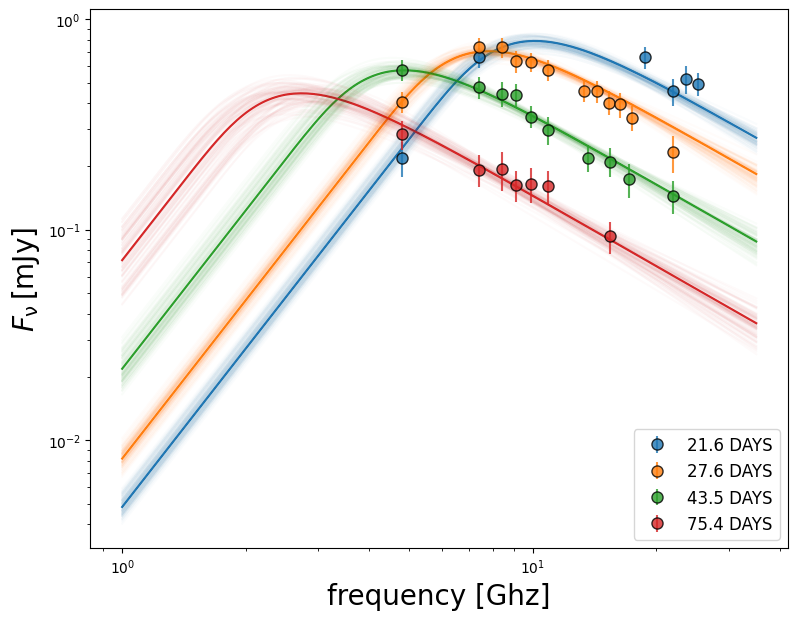

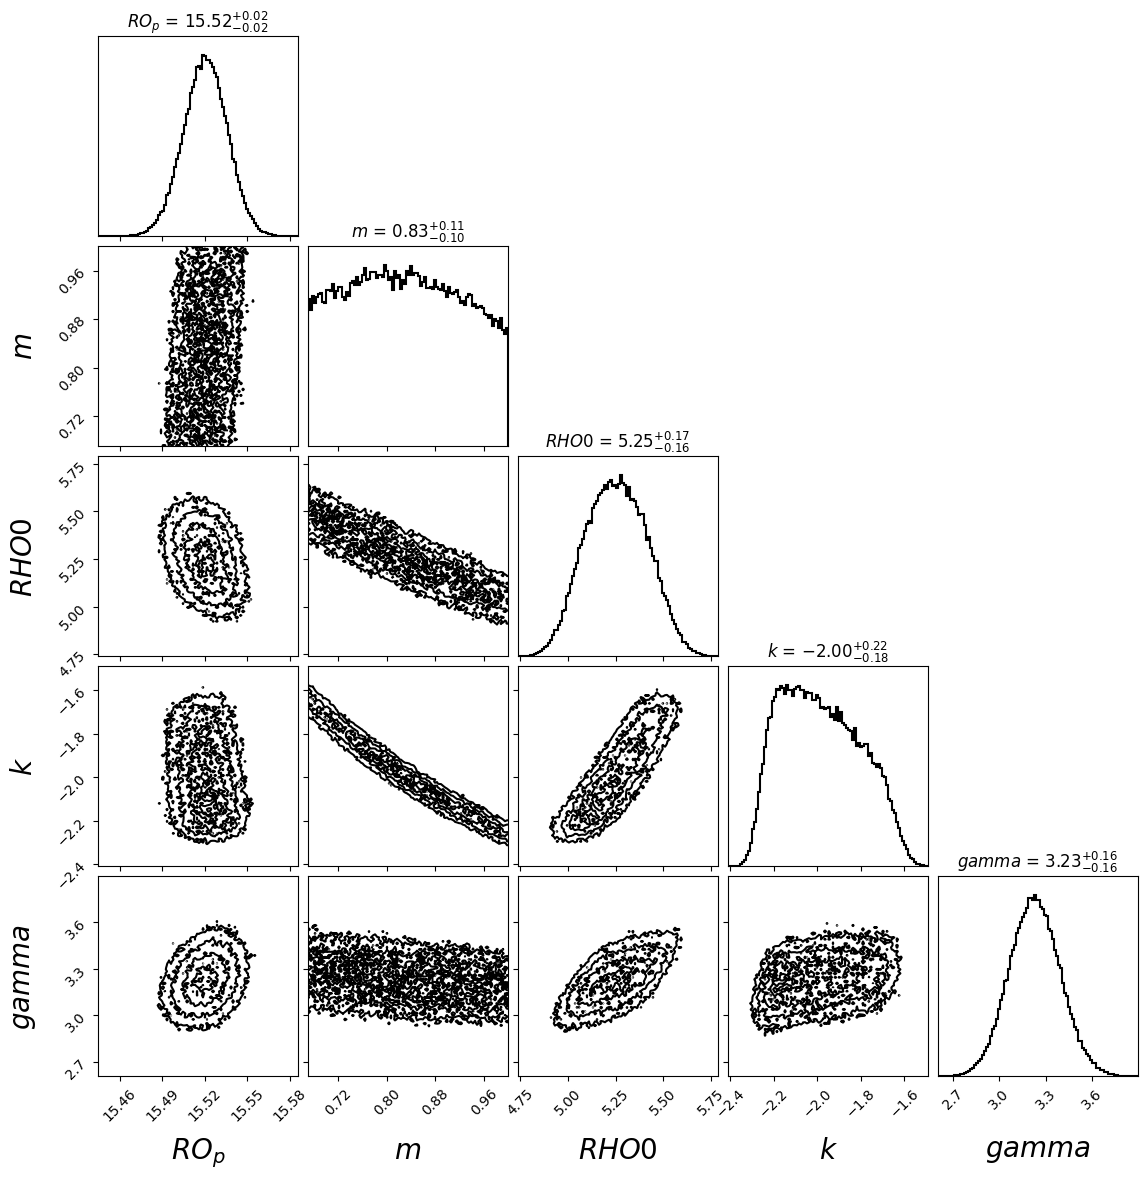

In [6]:
path_to_data= '/home/noa/_dev_/chveliers_eq1_fit/src/sn_2016X_mod.csv' 
# this is a call to run_prog function
fil2016XSampler, fil20216mcmcparams, fil2016flat = rs.run_prog(path_to_data,15.2*rs.MPC,-2,0.8,3,200,10000,True,True,False,True,False,xlim=[1,500])

You can also choose to not sample the m parameter (shockwave's radius power law)

init_guess [15.48921851  5.         -2.          3.        ]
sol [15.48921851  5.         -2.          3.        ]
Maximum likelihood estimates:
R0 = 15.489
RHO0 = 5.000
k = -2.000
gamma = 3.000


/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]
/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]


100%|██████████| 10000/10000 [05:29<00:00, 30.36it/s]


Serial took 329.4 seconds
15.52589856165671 5.033454056229036 -2.2589394258196367 3.1718291263674327


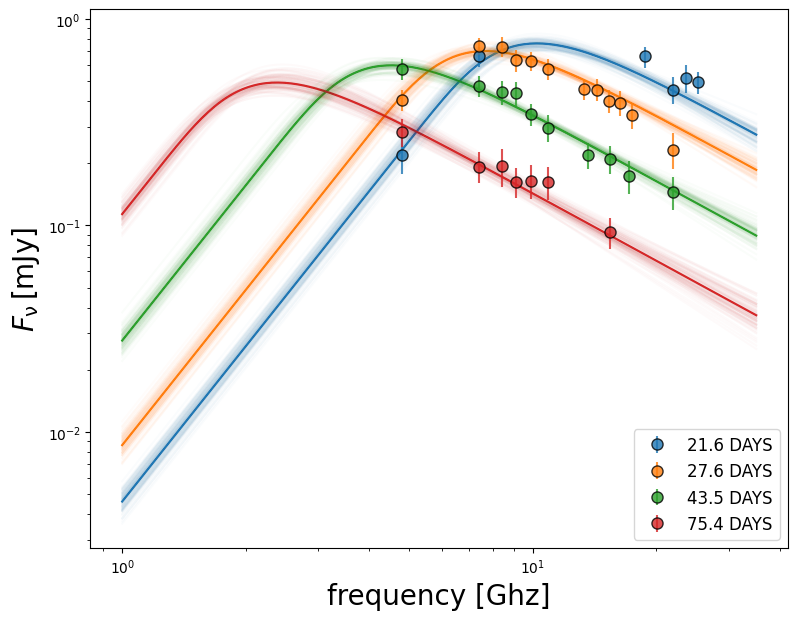

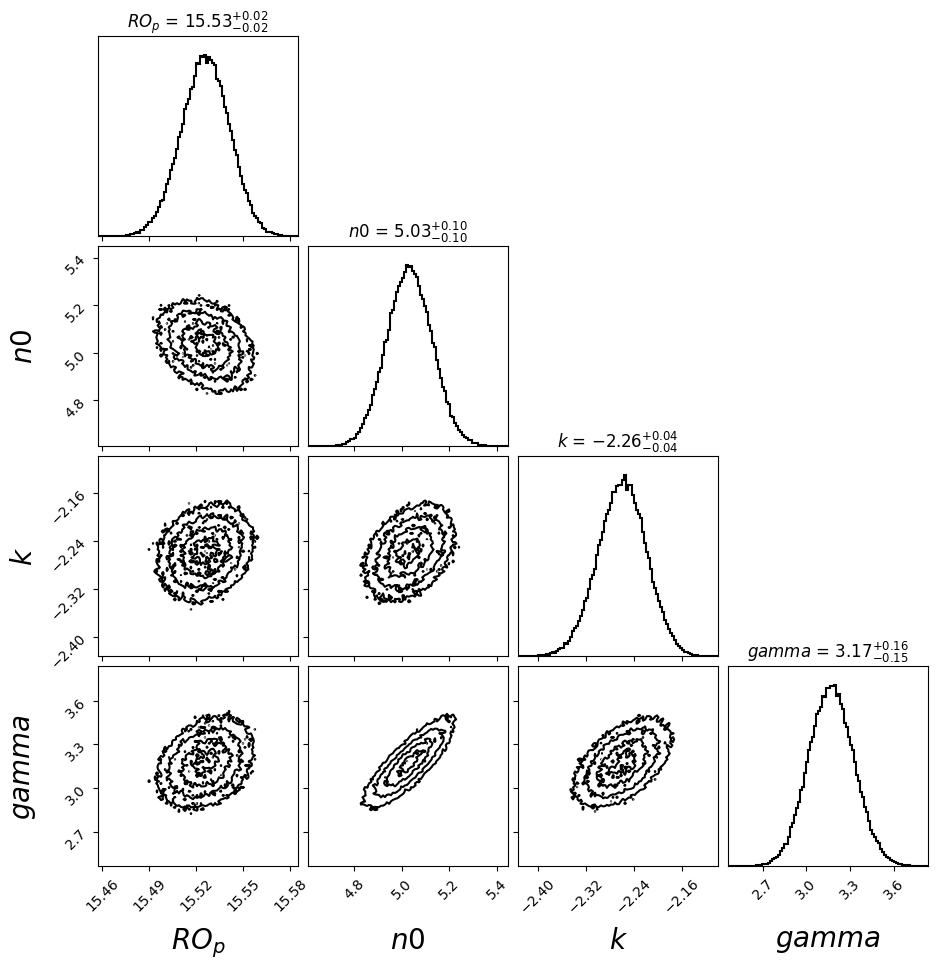

In [2]:
path_to_data= "sn_2016X_mod.csv"
# this is a call to run_prog function
fil2016XSampler, fil20216mcmcparams, fil2016flat = rs.run_prog(path_to_data,15.2*rs.MPC,-2,0.8,3,200,10000,fit_m=False,spectra=True,light_curve=False,slegend=True,lclegend=False)

init func: 
27.6 7.389999999999999e-27 7.4
init_guess [15.48921851  5.         -2.          3.        ]
sol [15.48921851  5.         -2.          3.        ]
Maximum likelihood estimates:
R0 = 15.489
RHO0 = 5.000
k = -2.000
gamma = 3.000


/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]
/home/noa/_dev_/chveliers_eq1_fit/myLib/my_library/RSPAnalyzer.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return peak_row[0],peak_row[1],peak_row[2]


100%|██████████| 10000/10000 [05:14<00:00, 31.79it/s]


Serial took 314.8 seconds
15.52589856165671 5.033454056229036 -2.2589394258196367 3.1718291263674327


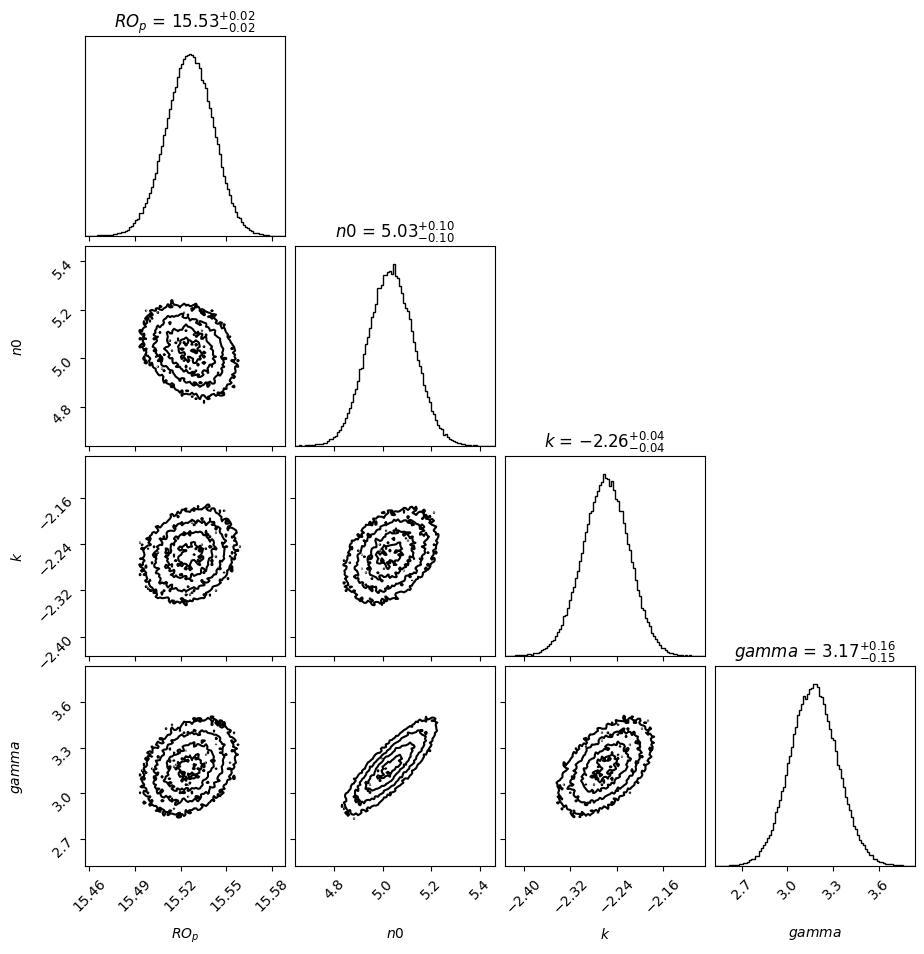

In [3]:

filtered_df2016X_nm= rs.csv_file_to_dfs("sn_2016X_mod.csv")

v_vec2016X_nm = filtered_df2016X_nm['freq'].values*rs.Ghz
t_vec2016X_nm =filtered_df2016X_nm['delta_t'].values*rs.DAYS
y2016X_nm = filtered_df2016X_nm['flux'].values
yerr2016X_nm = filtered_df2016X_nm['flux_err'].values

x2016X_nm = (t_vec2016X_nm, v_vec2016X_nm)
d2016X_nm=15.2*rs.MPC
tp2016X_nm,fp2016X_nm,vp2016X_nm = rs.find_flux_time_peak_value(filtered_df2016X_nm,'flux')
solnx2016X_nm = rs.calc_likeli_param_nm(x=x2016X_nm,y=y2016X_nm,yerr=yerr2016X_nm,d=d2016X_nm,k=-2,m=0.8,gamma=3)
sampler2016X_nm = rs.run_mcmc_get_sampler_nm(x=x2016X_nm,y=y2016X_nm,yerr=yerr2016X_nm,tp=tp2016X_nm,d=d2016X_nm,nwalkers=200,ndim=4,nsteps=10000,solnx=solnx2016X_nm)
flat_samples2016X_nm = sampler2016X_nm.get_chain(discard=1000, thin=15, flat=True)
mcmc_params2016X_nm = rs.extract_mcmc_params_nm(sampler2016X_nm)
# rs.plot_light_curve_nm(x=x2016X_nm,y=y2016X_nm,yerr=yerr2016X_nm,xlim=[1,500],ylim=[1e-1,15],tp=tp2016X_nm,d=d2016X_nm,mcmc_params=mcmc_params2016X_nm,flat_samples=flat_samples2016X_nm,legend=False)
fig2016X = corner.corner(flat_samples2016X_nm[1:],labels=[r'$RO_p$',r'$n0$',r'$k$',r'$gamma$'],bins=100,
                    show_titles=True,plot_density=False,plot_datapoints=False)